**IMPORT NECESSARY LIBRARIES**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

**READ THE DATASET**

In [2]:
f1=pd.read_csv("chronickidneydisease.csv")

In [3]:
f1.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
f1.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [5]:
#dropping column 'id' as it is unnecessary
f1.drop(["id"], axis=1, inplace=True)

In [6]:
#rename column names
f1.columns=['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
            'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium','hemoglobin', 'packed_cell_volume', 
            'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetesmellitus', 'coronary_artery_disease', 'appetite',
            'pedal_edema' , 'anemia', 'class'] 

In [7]:
f1.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

**EXPLANATORY DATA ANALYSIS**

In [8]:
f1.shape

(400, 25)

In [9]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [10]:
f1.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [26]:
cols=f1.columns
cols

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

**DATA VISUALISATION**

In [12]:
f1.describe().style.background_gradient(cmap = 'copper')

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [13]:
#corr
f1.corr(method='pearson')

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
blood_pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
specific_gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
blood_glucose_random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
blood_urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
serum_creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746


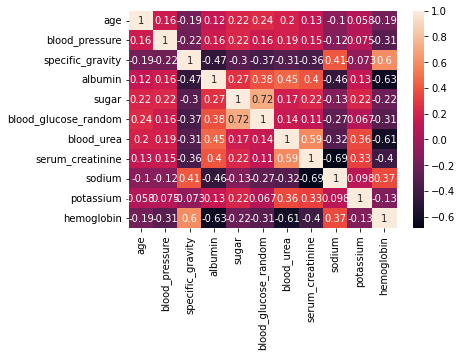

In [14]:
#heatmap
sns.heatmap(f1.corr(method='pearson'), annot = True);
plt.show()

In [18]:
#target column
#target column
f1['class'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: class, dtype: int64

In [19]:
f1['class']=f1['class'].replace("ckd\t", "ckd")
f1['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [20]:
f1['class'].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

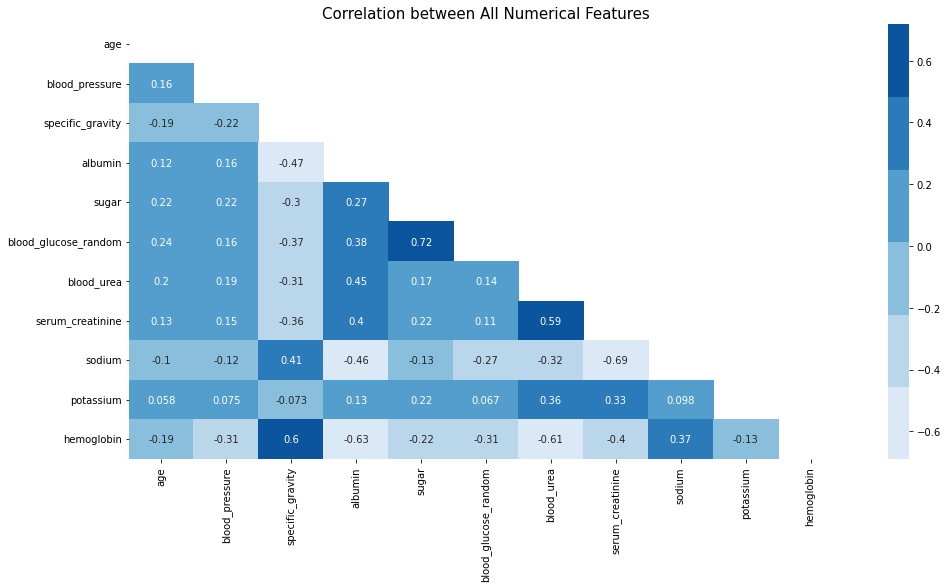

In [39]:
plt.figure(figsize=(16,8))
plt.title('Correlation between All Numerical Features',size=15)

# create mask
mask=np.triu(np.ones_like(f1.corr()))

# create colormap
colormap=sns.color_palette('Blues')
# plot heatmap
sns.heatmap(f1.corr(),annot=True,cmap=colormap,mask=mask)
plt.show()

**UNIVARIATE ANALYSIS**

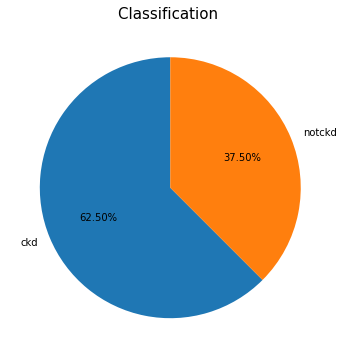

In [21]:
#pie chart
attr_count=f1['class'].value_counts()
attr_label=f1['class'].value_counts().index

# plot
fig,ax=plt.subplots(figsize=(14,6))
ax.pie(attr_count,explode=None,labels=attr_label,autopct='%.2f%%',startangle=90)
ax.set_title("Classification ",fontsize=15)
plt.show()

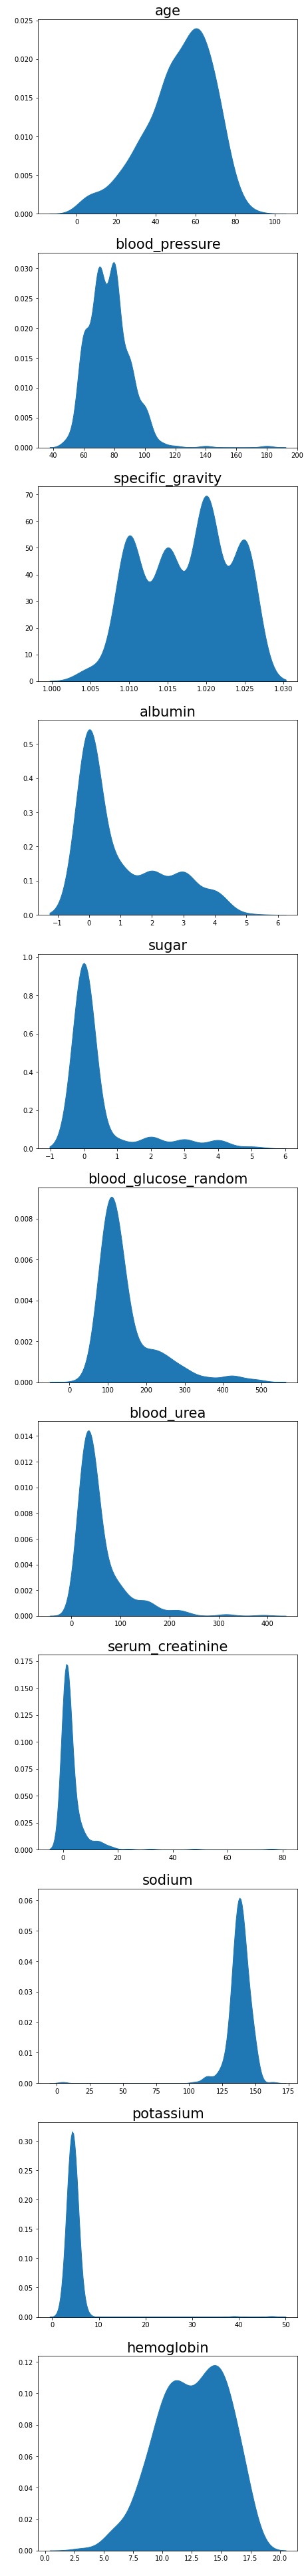

In [29]:
# define numeric features
num_cols=list(f1.select_dtypes(['int64','float64']))
ig,ax=plt.subplots(figsize=(7,70),ncols=1,nrows=11)

i=0
for cols in num_cols:
    sns.kdeplot(x=f1[cols],fill=True,alpha=1,ax=ax[i])
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].set_title(cols,fontsize=21)
    i=i+1
plt.show()

**BIVARIATE ANALYSIS**

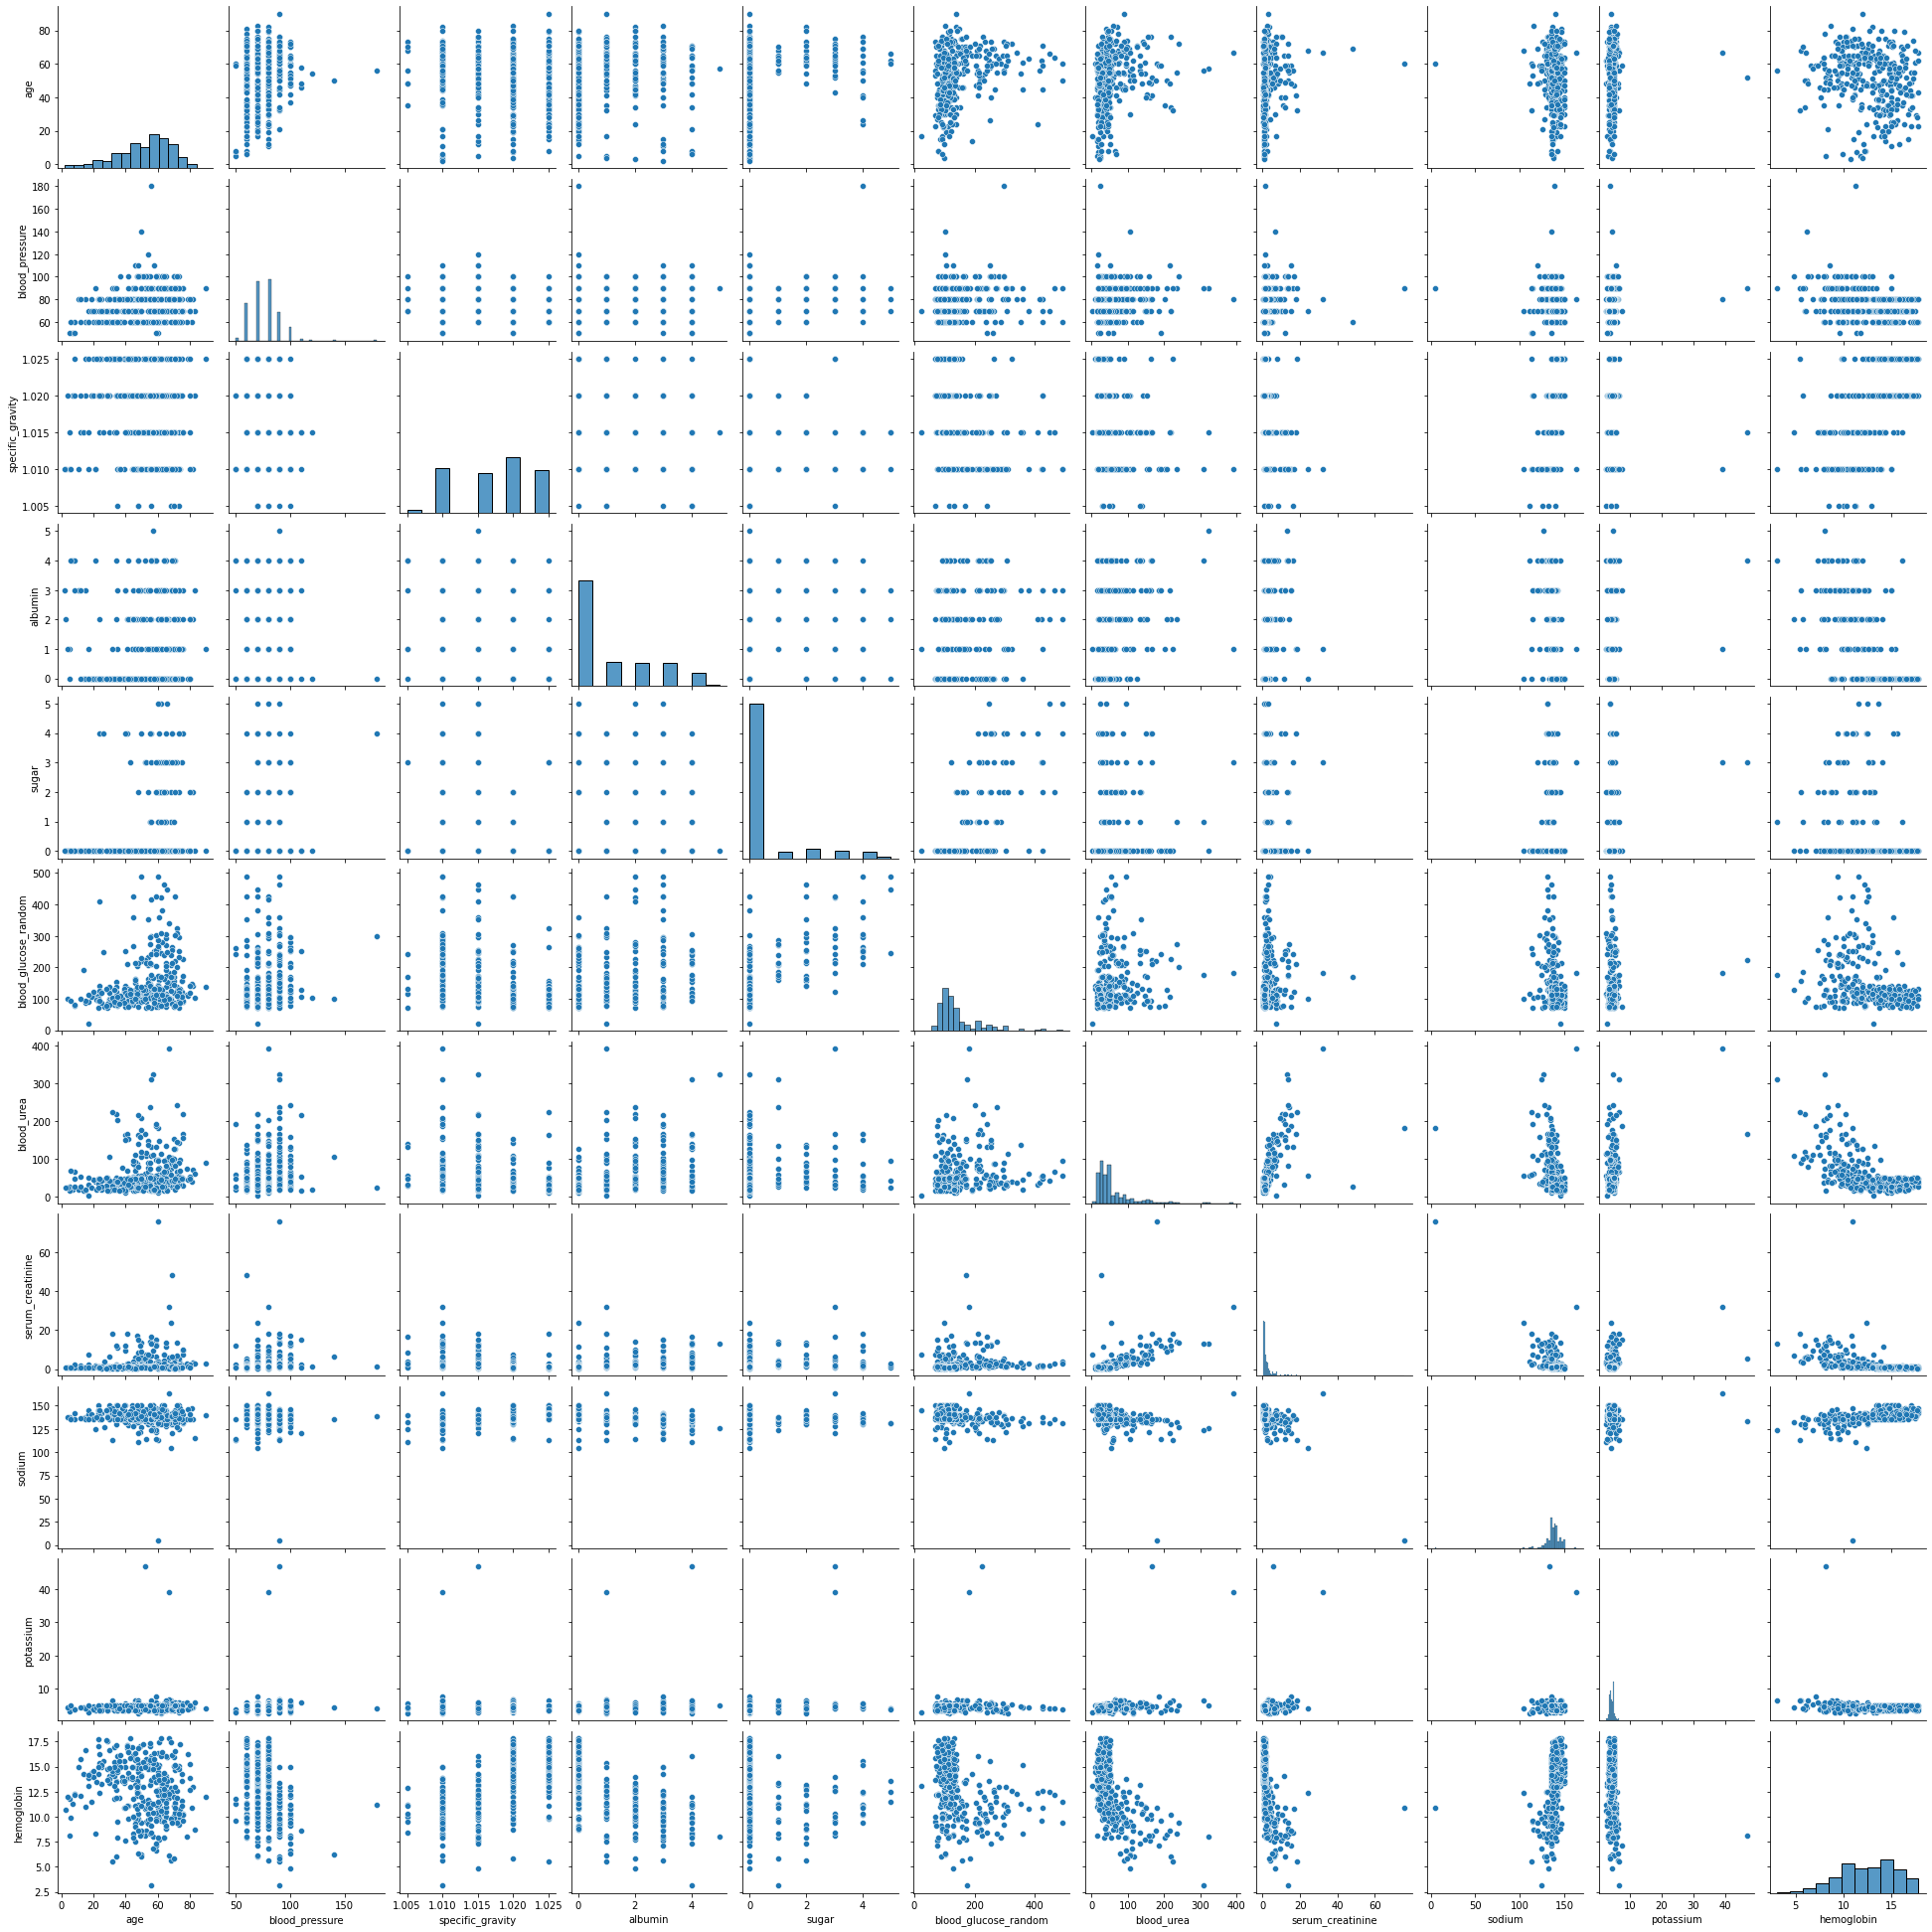

In [30]:
#pairplot
sns.pairplot(f1)
plt.show()

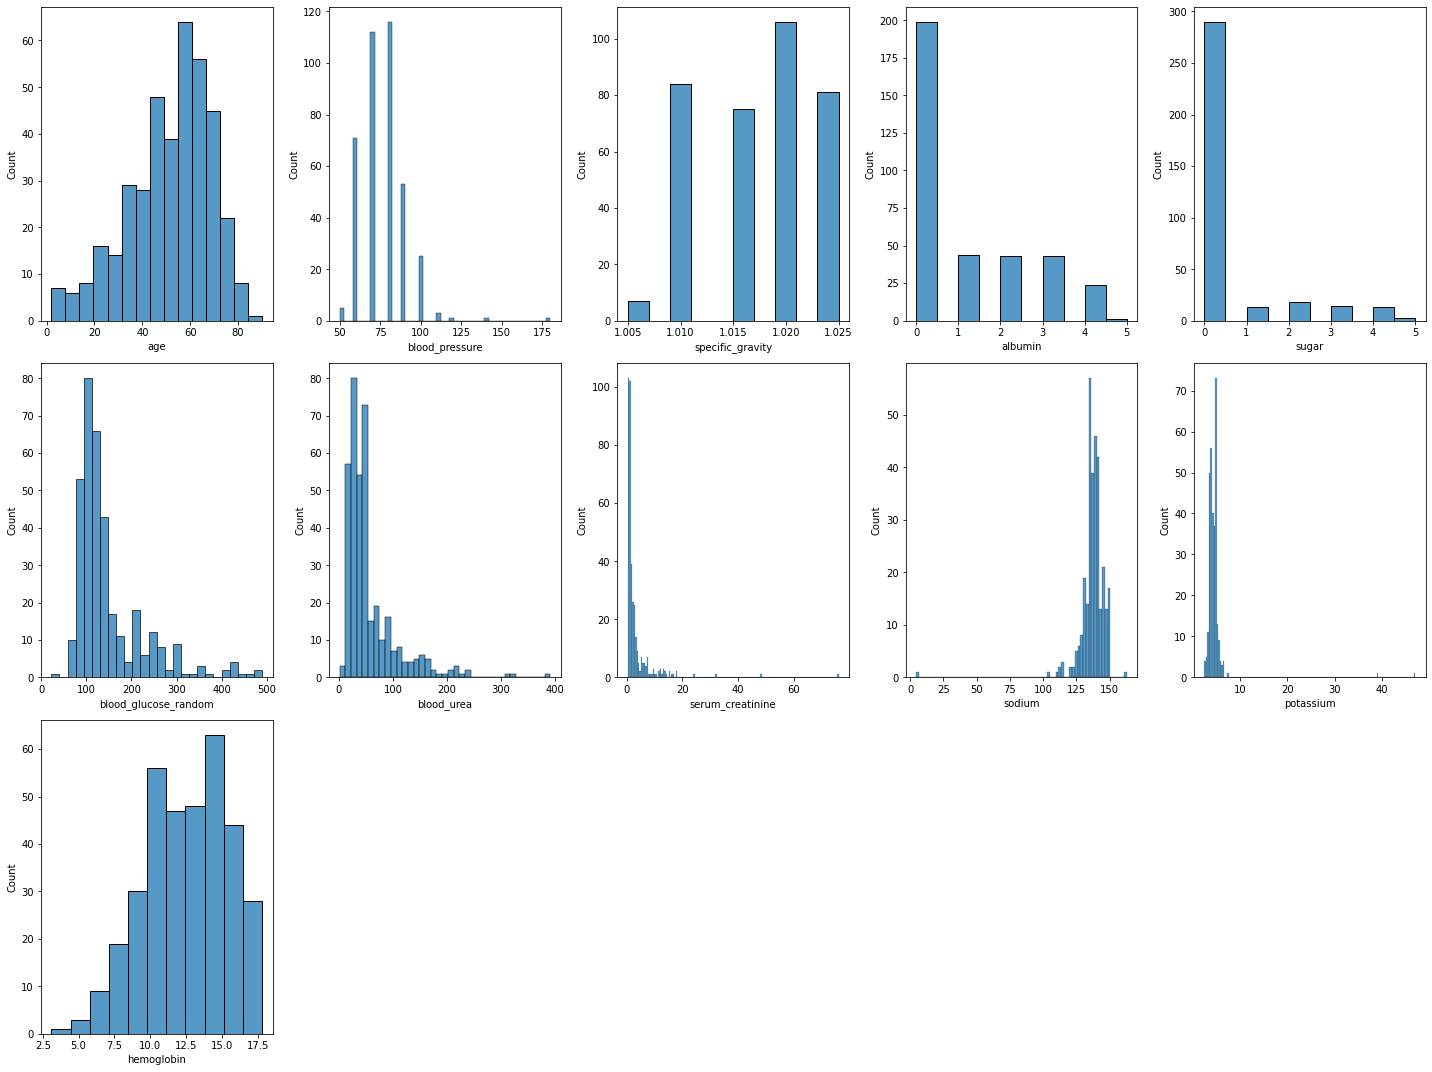

In [32]:
#histplot-distribution of data
plt.figure(figsize = (20, 15))
plotnumber = 1

for cols in num_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(f1[cols])
        plt.xlabel(cols)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

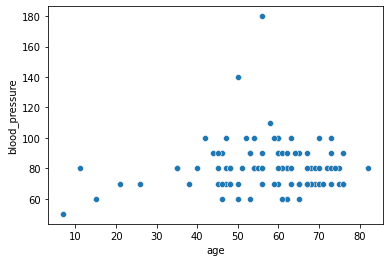

In [33]:
#scatterplot for age and blood_pressure
sns.scatterplot(x=f1.iloc[:100,:]["age"],y=f1.iloc[:100,:]["blood_pressure"])
plt.show()

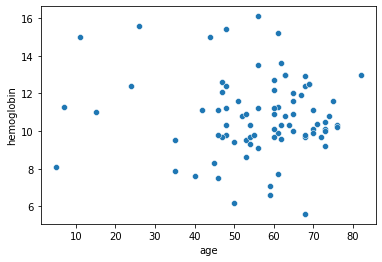

In [34]:
#scatterplot for age and hemoglobin
sns.scatterplot(x=f1.iloc[:100,:]["age"],y=f1.iloc[:100,:]["hemoglobin"])
plt.show()

**MULTI-VARIATE ANALYSIS**

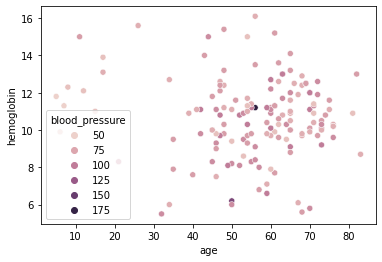

In [35]:
#scatterplot for age, hemoglobin and blood_pressure
sns.scatterplot(x=f1.iloc[:200,:]["age"],y=f1.iloc[:200,:]["hemoglobin"],hue=f1.iloc[:200,:]["blood_pressure"])
plt.show()

**DESCRIPTIVE STATISTICS**

In [36]:
f1.mode(numeric_only=True)

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
0,60.0,80.0,1.02,0.0,0.0,99.0,46.0,1.2,135.0,3.5,15.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN


In [37]:
f1.median(numeric_only=True)

age                      55.00
blood_pressure           80.00
specific_gravity          1.02
albumin                   0.00
sugar                     0.00
blood_glucose_random    121.00
blood_urea               42.00
serum_creatinine          1.30
sodium                  138.00
potassium                 4.40
hemoglobin               12.65
dtype: float64

In [40]:
# check skewness of the distribution 
skew=[]
for cols in num_cols:
    skew.append(round(f1[cols].skew(),3))
skew_dist=pd.DataFrame({'Features':num_cols,'Skewness':skew})
skew_dist

,Features,Skewness
0,age,-0.668
1,blood_pressure,1.605
2,specific_gravity,-0.172
3,albumin,0.998
4,sugar,2.464
5,blood_glucose_random,2.011
6,blood_urea,2.634
7,serum_creatinine,7.510
8,sodium,-6.997
9,potassium,11.583


In [42]:
# check kurtosis of the distribution 
kurt=[]
for cols in num_cols:
    kurt.append(round(f1[cols].kurt(),3))
kurt_dist=pd.DataFrame({'Features':num_cols,'Kurtosis':kurt})
kurt_dist

,Features,Kurtosis
0,age,0.058
1,blood_pressure,8.646
2,specific_gravity,-1.144
3,albumin,-0.383
4,sugar,5.055
5,blood_glucose_random,4.226
6,blood_urea,9.345
7,serum_creatinine,79.304
8,sodium,85.534
9,potassium,142.506
